<a href="https://colab.research.google.com/github/dealtron/Proyek-Akhir-Dicoding/blob/master/Proyek%20Akhir%20%3A%20Klasifikasi%20Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Akhir : Klasifikasi Gambar

Nama : Aditya Ramadhan Moesya

Machine Learning - IBM

Disini saya akan mengerjakan tugas pertama saya di Dicoding pada sertifikasi "Belajar Machine Learning untuk Pemula". 

# Kriteria Submission
Berikut kriteria submission yang harus Anda penuhi:

*   Dataset yang dipakai haruslah dataset berikut : rockpaperscissors, atau gunakan link ini pada wget command: https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip,
*   Dataset harus dibagi menjadi train set dan validation set
*   Ukuran validation set harus 40% dari total dataset (data training memiliki 1314 sampel, dan data validasi sebanyak 874 sampel),
*   Harus mengimplementasikan augmentasi gambar,
*   Menggunakan image data generator,
*   Model harus menggunakan model sequential,
*   Pelatihan model tidak melebihi waktu 30 menit,
*   Program dikerjakan pada Google Colaboratory,
*   Akurasi dari model minimal 85%,
*   Dapat memprediksi gambar yang diunggah ke Colab seperti gambar di bawah.

# Code

## Importing Library and Dataset

Pertama-tama, disini saya akan mengimport library untuk mengextract zip file dari dataset terlebih dahulu dan menaruh nya di 'train-dir'.

In [2]:
import os
import zipfile
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip
zip_file = '/tmp/rockpaperscissors.zip'
train_dir = '/tmp/rockpaperscissors/rps-cv-images/'
zip_extract = zipfile.ZipFile(zip_file, 'r')
zip_extract.extractall('/tmp')
zip_extract.close()

--2021-07-09 17:39:55--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.95MB/s    in 1m 59s  

2021-07-09 17:41:55 (2.58 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



Lalu disini saya akan mengimport library tensorflow

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

Dan disini saya akan mengimport matplotlib untuk membuat plot dan show image, numpy, dan files untuk mengupload file.

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np
from google.colab import files

## Showing Dataset

Disini saya akan melihat isi dari directory dataset yang akan kita pakai, dan kemudian saya lihat jumlah images dari tiap sign, lalu saya akan memperlihatkan salah satu gambar dari tiap sign-nya.

In [5]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['rock', 'paper', 'README_rpc-cv-images.txt', 'scissors']

In [7]:
print('Total Rock Hand Sign Images :', len(os.listdir('/tmp/rockpaperscissors/rps-cv-images/rock')))
print('Total Paper Hand Sign Images :', len(os.listdir('/tmp/rockpaperscissors/rps-cv-images/paper')))
print('Total Scissor Hand Sign Images :', len(os.listdir('/tmp/rockpaperscissors/rps-cv-images/scissors')))

Total Rock Hand Sign Images : 726
Total Paper Hand Sign Images : 712
Total Scissor Hand Sign Images : 750


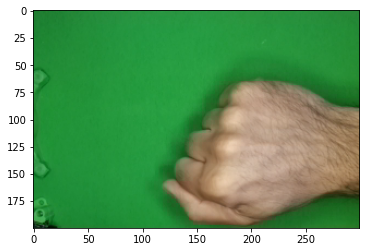

In [8]:
img_r = image.load_img('/tmp/rockpaperscissors/rps-cv-images/rock/00nKV8oHuTGi20gq.png')
imgplot_r = plt.imshow(img_r)

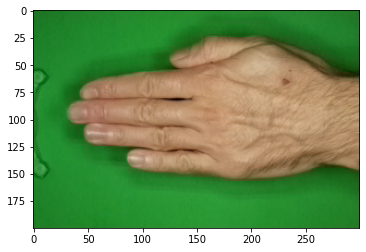

In [9]:
img_p = image.load_img('/tmp/rockpaperscissors/rps-cv-images/paper/0a3UtNzl5Ll3sq8K.png')
imgplot_p = plt.imshow(img_p)

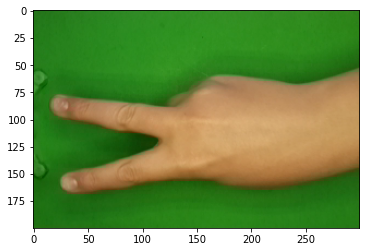

In [10]:
img_s = image.load_img('/tmp/rockpaperscissors/rps-cv-images/scissors/0CSaM2vL2cWX6Cay.png')
imgplot_s = plt.imshow(img_s)

## Assigning Datagen and Image Classification

Disini saya akan menggunakan ImageDataGenerator dan melakukan asign terhadap train dan validation generatornya. Disini saya menggunakan batch size sebesar 32 untuk train dan validation generatornya, dan size 100x150 karena itu adalah versi 1/2 kalinya dari ukuran asli foto dataset, yaitu 200x300.

In [11]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    shear_range = 0.2,
    fill_mode = 'nearest',
    horizontal_flip=True,
    validation_split = 0.4)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size = (100, 150),
    class_mode = 'categorical',
    batch_size = 32,
    subset = 'training')

validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size = (100, 150),
    class_mode = 'categorical',
    batch_size = 32,
    subset = 'validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


Dan disini saya akan membuat model untuk mengklasifikasi model saya

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')])

In [14]:
model.compile(
    optimizer = tf.optimizers.Adam(),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [15]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 25,
    steps_per_epoch = 20,
    verbose = 1)

Epoch 1/25
20/20 [==============================] - 21s 1s/step - loss: 1.1811 - accuracy: 0.3766 - val_loss: 1.0979 - val_accuracy: 0.3432
Epoch 2/25
20/20 [==============================] - 20s 990ms/step - loss: 1.0805 - accuracy: 0.3918 - val_loss: 1.0844 - val_accuracy: 0.4073
Epoch 3/25
20/20 [==============================] - 20s 1s/step - loss: 0.9934 - accuracy: 0.5531 - val_loss: 1.0063 - val_accuracy: 0.5492
Epoch 4/25
20/20 [==============================] - 20s 1s/step - loss: 0.8773 - accuracy: 0.6187 - val_loss: 0.9186 - val_accuracy: 0.7265
Epoch 5/25
20/20 [==============================] - 20s 1s/step - loss: 0.5597 - accuracy: 0.8031 - val_loss: 0.4325 - val_accuracy: 0.8558
Epoch 6/25
20/20 [==============================] - 20s 1s/step - loss: 0.4238 - accuracy: 0.8438 - val_loss: 0.4014 - val_accuracy: 0.9027
Epoch 7/25
20/20 [==============================] - 20s 991ms/step - loss: 0.2687 - accuracy: 0.8934 - val_loss: 0.2745 - val_accuracy: 0.9302
Epoch 8/25
20/

## Visualizing Model Accuracy

Disini saya memvisualisasikan setiap model akurasi pada tiap epoch yang telah dijalankan menggunakan matplotlib.

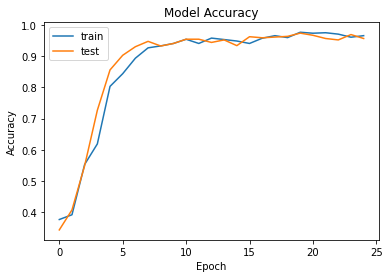

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## New Image Prediction

Dan yang terakhir, disini saya dapat mengupload gambar yang saya punya untuk diprediksi dengan menggunakan model yang telah saya buat dan saya latih sebelumnya.

Saving 20210709_220750.jpg to 20210709_220750 (3).jpg
20210709_220750.jpg
The handsign in the picture is paper


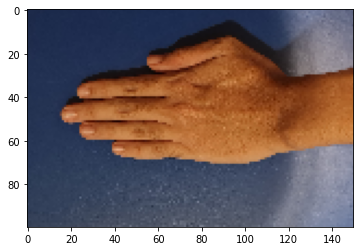

In [29]:
uploaded = files.upload()
for fn in uploaded.keys():
  path = fn 
  img = image.load_img(path, target_size =(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  image_pred = np.vstack([x])
  classes = model.predict(image_pred, batch_size=32)

  print(fn)
  x = 'The handsign in the picture is '
  if classes[0,0]==1:
    print(x + 'paper')
  elif classes[0,1]==1:
    print(x + 'rock')
  else:
    print(x + 'scissors')